In [59]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from data_read import *  

In [60]:
data_loader_remote_sensing()

In [61]:
num_sample=len(satellite_img_list)
index=random.randint(0,num_sample-1)

In [62]:
img_1,img_2,img_3,img_4=generate_samples(index,satellite_img_list,cropped_img_in_original_HRO_list,label_list,simulated_drone_img_list)

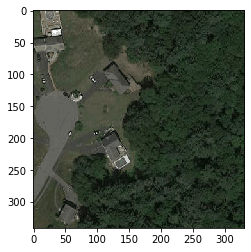

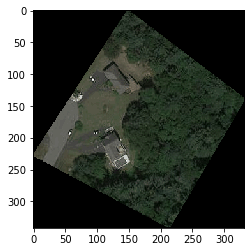

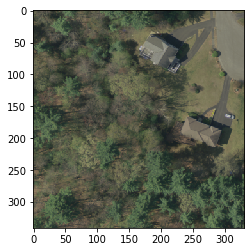

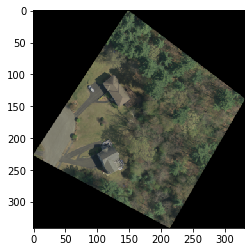

In [50]:
plt.imshow(img_1)
plt.show()
plt.imshow(img_2)
plt.show()
plt.imshow(img_3)
plt.show()
plt.imshow(img_4)
plt.show()


# SIFT + RANSAC

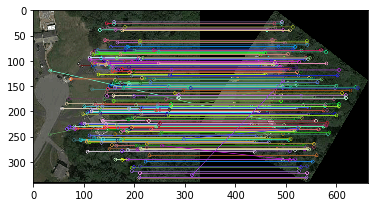

(<matplotlib.image.AxesImage at 0x7f1577ea5438>, None)

In [51]:
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
img_1_8bit = cv2.normalize(img_1, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
img_2_8bit = cv2.normalize(img_2[:,:,:3], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')


kp1, des1 = sift.detectAndCompute(img_1_8bit,None)
kp2, des2 = sift.detectAndCompute(img_2_8bit,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img_1_8bit,kp1,img_2_8bit,kp2,good,None,flags=2)

plt.imshow(img3),plt.show()

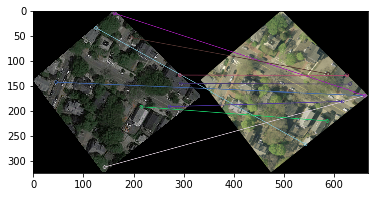

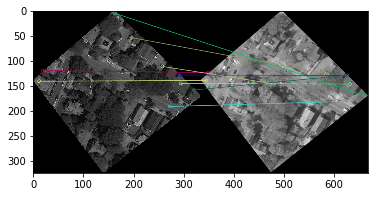

(<matplotlib.image.AxesImage at 0x7f1577ff9f98>, None)

In [65]:
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
img_1_8bit = cv2.normalize(img_2, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
img_2_8bit = cv2.normalize(img_4[:,:,:3], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')


kp1, des1 = sift.detectAndCompute(img_1_8bit,None)
kp2, des2 = sift.detectAndCompute(img_2_8bit,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img_1_8bit,kp1,img_2_8bit,kp2,good,None,flags=2)

plt.imshow(img3),plt.show()


gray_1= cv2.cvtColor(img_1_8bit ,cv2.COLOR_RGB2GRAY)

gray_2= cv2.cvtColor(img_2_8bit ,cv2.COLOR_RGB2GRAY)

kp1, des1 = sift.detectAndCompute(gray_1,None)
kp2, des2 = sift.detectAndCompute(gray_2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(gray_1,kp1,gray_2,kp2,good,None,flags=2)

plt.imshow(img3),plt.show()



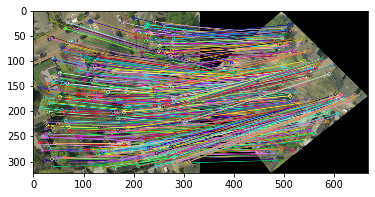

(<matplotlib.image.AxesImage at 0x7f157801f908>, None)

In [66]:
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
img_1_8bit = cv2.normalize(img_3[:,:,:3], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
img_2_8bit = cv2.normalize(img_4[:,:,:3], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')


kp1, des1 = sift.detectAndCompute(img_1_8bit,None)
kp2, des2 = sift.detectAndCompute(img_2_8bit,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img_1_8bit,kp1,img_2_8bit,kp2,good,None,flags=2)

plt.imshow(img3),plt.show()

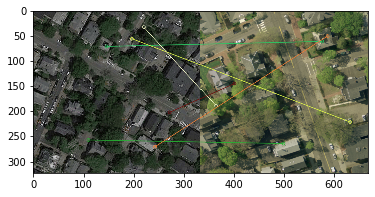

(<matplotlib.image.AxesImage at 0x7f157828e518>, None)

In [67]:
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
img_1_8bit = cv2.normalize(img_1[:,:,:3], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
img_2_8bit = cv2.normalize(img_3[:,:,:3], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')


kp1, des1 = sift.detectAndCompute(img_1_8bit,None)
kp2, des2 = sift.detectAndCompute(img_2_8bit,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img_1_8bit,kp1,img_2_8bit,kp2,good,None,flags=2)

plt.imshow(img3),plt.show()

In [68]:
MIN_MATCH_COUNT=4
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m[0].queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m[0].trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img_1_8bit.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    
    img_reverse = cv2.warpPerspective(img_2_8bit,np.linalg.inv(M),(w,h))

    img2 = cv2.polylines(img_2_8bit,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print ("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None

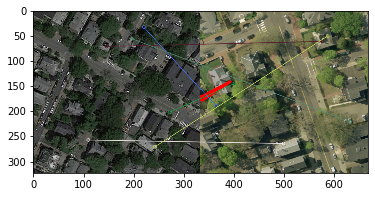

(<matplotlib.image.AxesImage at 0x7f1577e18e48>, None)

In [69]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatchesKnn(img_1_8bit,kp1,img_2_8bit,kp2,good,None,flags=2)

plt.imshow(img3),plt.show()

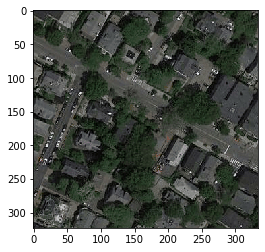

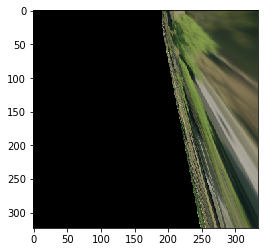

In [70]:
plt.imshow(img_1_8bit)
plt.show()
plt.imshow(img_reverse)
plt.show()

# SIFT+Ransac Evaluate

In [76]:
def calculate_four_conner_error(u_list_pre,v_list_pre,u_list_gt,v_list_gt):
    error=0.0
    for i in range(len(u_list_pre)):
        error=error+np.sqrt((u_list_pre[i]-u_list_gt[i])**2+(v_list_pre[i]-v_list_gt[i])**2)
    return error/4.0
    
    
def output_four_cornner(img_1,img_3):
    #img_1 is the satellite image
    #img_3 is the simulated drone image
    u_list=[]
    v_list=[]
    sift = cv2.xfeatures2d.SIFT_create()

    # find the keypoints and descriptors with SIFT
    img_1_8bit = cv2.normalize(img_1[:,:,:3], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    img_2_8bit = cv2.normalize(img_3[:,:,:3], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    
    #img_1_8bit= cv2.cvtColor(img_1_8bit ,cv2.COLOR_RGB2GRAY)

    #img_2_8bit= cv2.cvtColor(img_2_8bit ,cv2.COLOR_RGB2GRAY)


    kp1, des1 = sift.detectAndCompute(img_1_8bit,None)
    kp2, des2 = sift.detectAndCompute(img_2_8bit,None)

    # BFMatcher with default params
    bf = cv2.BFMatcher()
    if len(np.shape(des1))<2 or len(np.shape(des2))<2:
        u_list=[1000,1000,1000,1000]
        v_list=[1000,1000,1000,1000]
        img_reverse=[1]
        
        return u_list,v_list, img_reverse
    matches = bf.knnMatch(des1,des2, k=2)

    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])
        #good.append([m])
            
    h,w = img_1_8bit.shape[:2]        
    MIN_MATCH_COUNT=3
    if len(good)>MIN_MATCH_COUNT:
        src_pts = np.float32([ kp1[m[0].queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m[0].trainIdx].pt for m in good ]).reshape(-1,1,2)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        if len(np.shape(M))<2:
            u_list=[1000,1000,1000,1000]
            v_list=[1000,1000,1000,1000]
            img_reverse=[1]
        
            return u_list,v_list, img_reverse
        matchesMask = mask.ravel().tolist()

        pts = np.float32([ [0,0],[w-1,0],[w-1,h-1],[0,h-1] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,np.linalg.inv(M))
        img_reverse = cv2.warpPerspective(img_2_8bit,np.linalg.inv(M),(w,h))
        dst=np.squeeze(dst)
        for j in range(4):
            u_list.append(dst[j,0])
            v_list.append(dst[j,1])
    else:
        u_list=[1000,1000,1000,1000]
        v_list=[1000,1000,1000,1000]
        img_reverse=[1]
        
    return u_list,v_list, img_reverse
        
        



0
1250.426442021043
1
!!!!!
1
233.82837296955046
2
240.81735840278992
3
157.97218362257843
4
1222.224380771168
2
!!!!!
5
1229.1741416256605
3
!!!!!
6
1206.6628315947928
4
!!!!!
7
1200.8994041105407
5
!!!!!
8
274.978733011343
9
1035.8358920417888
10
1753.8424642553105
11
278.4935334534516
12
188.38077746231872
13
1203.5059385465786
6
!!!!!
14
1199.38937065312
7
!!!!!
15
1226.8987498988372
8
!!!!!
16
197.5878667833137
17
1214.6751923132447
9
!!!!!
18
186.1354940189443
19
3662.5561885335883
20
250.03297760662457
21
211.04806640896584
22
200.64670222193416
23
234.4311023782297
24
209.3837417873412
25
1222.8238121583177
10
!!!!!
26
1196.8608804754986
11
!!!!!
27
58.38953675291714


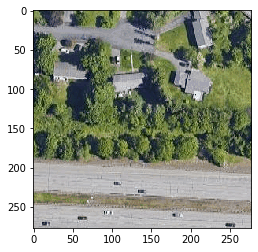

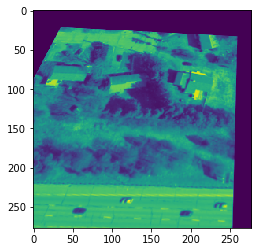

28
1187.0239059263658
12
!!!!!
29
1242.3794307738124
13
!!!!!
30
341.6709310966953
31
1255.3035202616456
14
!!!!!
32
1196.9042358401332
15
!!!!!
33
1749.0009358453715
34
1255.0708757755
16
!!!!!
35
177.21917029811448
36
1226.839689947179
17
!!!!!
37
1211.2206738197474
18
!!!!!
38
1197.8518604531669
19
!!!!!
39
1182.005521524887
20
!!!!!
40
314.1968335930599
41
347.9488858861467
42
2748.1253798619605
43
1207.4651120527967
21
!!!!!
44
1210.6744728676376
22
!!!!!
45
315.4411674215938
46
1171.81187605714
23
!!!!!
47
207.4463707820843
48
1200.7489512567722
24
!!!!!
49
69.5644047081575


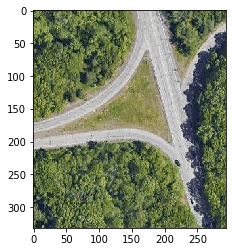

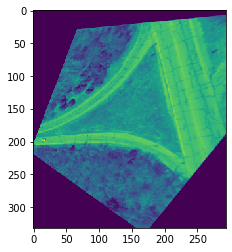

50
189.99091339831594
51
200.01514651038678
52
182.75266592555806
53
164.2900329808037
54
451.7822518098189
55
395.93067900752266
56
192.22305993423979
57
769.4256739217464
58
229.4184891088479
59
1221.696982205406
60
141.0586047294825


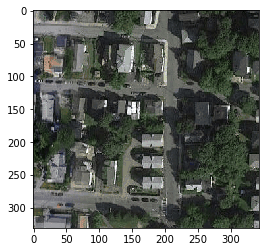

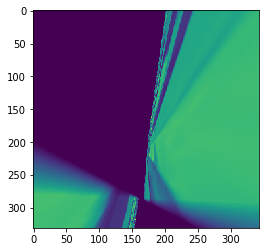

61
29.50197780101474


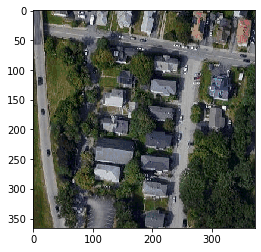

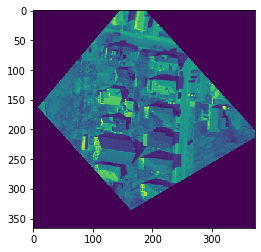

62
646.7550549456644
63
28.17882594502194


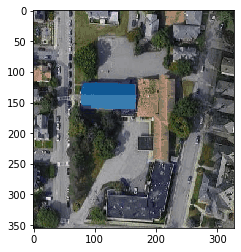

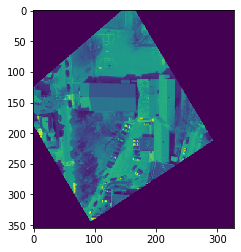

64
246.62287582312894
65
31.525586829759725


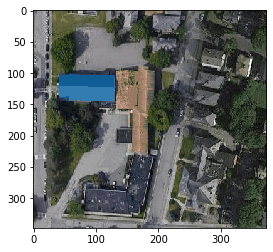

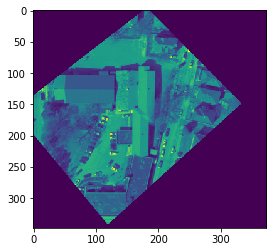

66
3354.5545125478448
67
392.97162385580435
68
2907.520404808321
69
42.513536452137984


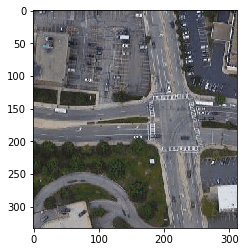

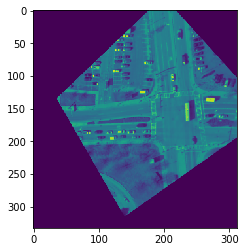

70
138.34527060751367


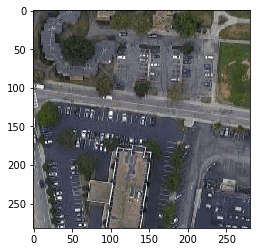

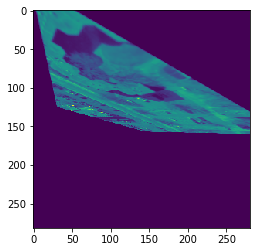

71
234.1999986359127
72
415.5711696803271
73
187.96024605270256
74
1353.1659297719805
75
375.39523292110744
76
232.97097453162803
77
239.4438050087227
78
323.8825622808101
79
286.5994859916973
80
156.90282548758714
81
175.2036794019237
82
30.575283492432582


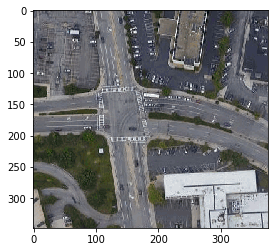

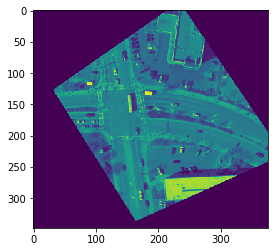

83
426.1447452447144
84
186.59188270071678
85
877.0532322131114
86
276.6637326205281
87
7818.138303825491
88
2616.7729464223394
89
332.5044671512215
90
198.64532455122762
91
372.7444984168884
92
231.51943365253945
93
204.99999626917798
94
25.23972534112437


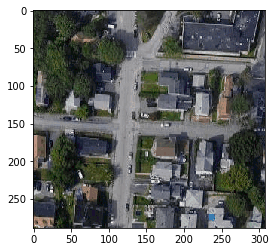

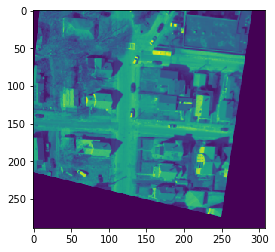

95
191.11602206048343
96
34.969628344286036


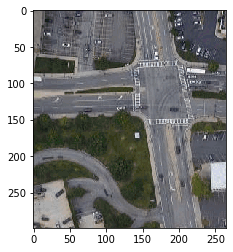

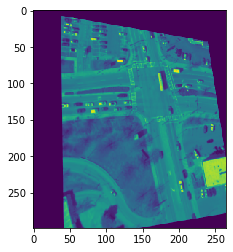

97
236.73347198904733
98
175.63490598323364
99
375.9356618918352
100
154.54125896706068
101
207.36193707706278
102
43.103084670810595


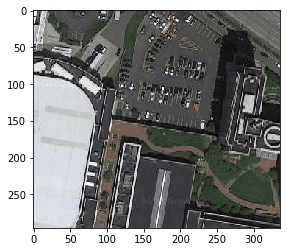

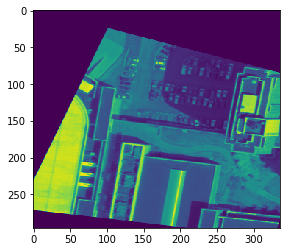

103
18.251553359959352


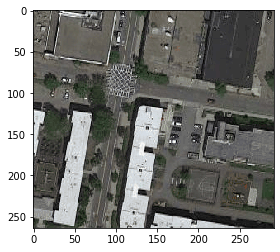

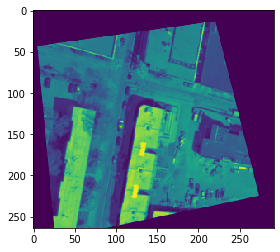

104
51.35628357617732


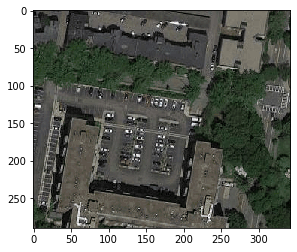

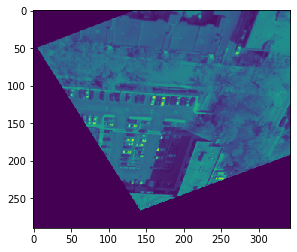

105
1221.5357702501947
25
!!!!!
106
488.30151484719835
107
30.778997575258394


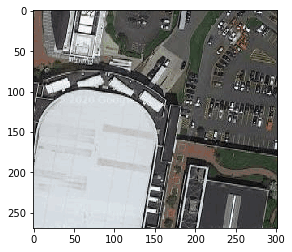

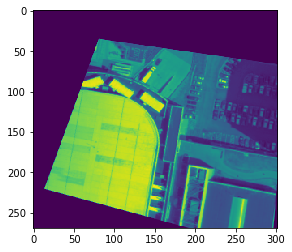

108
278.9782565507407
109
407.3580712437297
110
1086.7082333799674
111
13.202861593369267


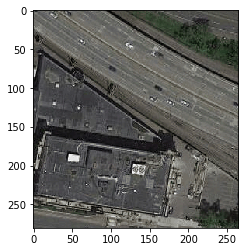

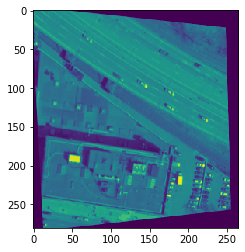

112
1249.648978976055
26
!!!!!
113
1028.365431135315
114
23.888186520931555


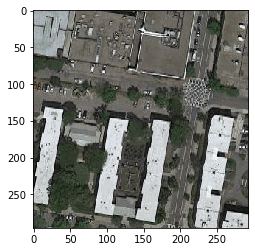

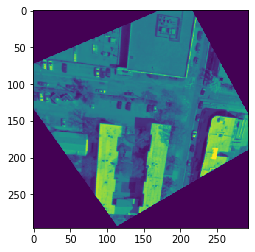

115
186.2695279053287
116
1226.2806215770945
27
!!!!!
117
1228.6356175308501
28
!!!!!
118
6.24199354635907


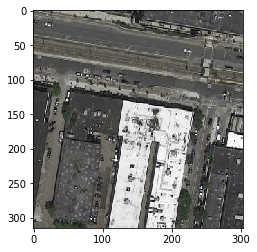

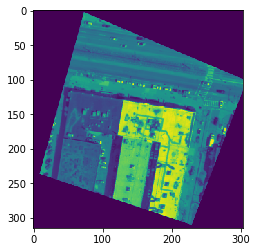

119
980.142987533639
120
9.131161285993421


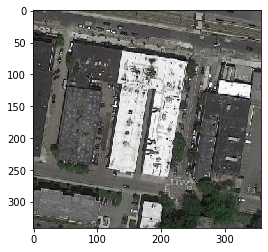

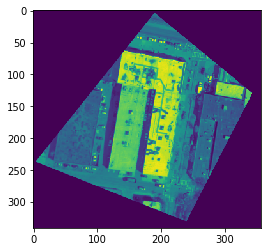

121
364.07367919844006
122
213.64190558220892
123
172.46446896132284
124
62.865073175477335


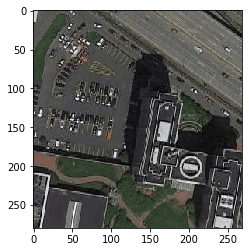

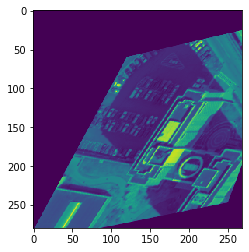

125
711.0037206513911
126
319.9193567437927
127
1223.4283084000513
29
!!!!!
128
238.92841389207513
129
17.698991803081633


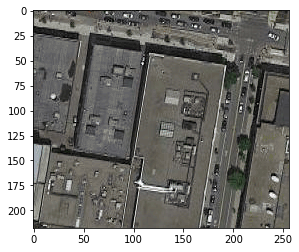

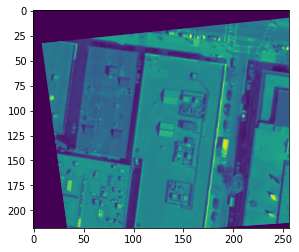

130
2239.2047318158156
131
199.8226162437768
132
278.4960741715951
133
378.6170214187032
134
15.433610729601316


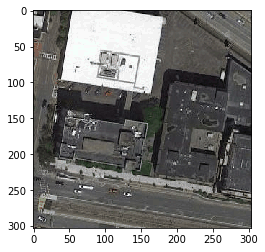

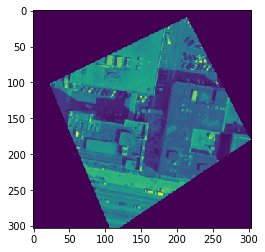

135
348.1500840903096
136
22.18643975581889


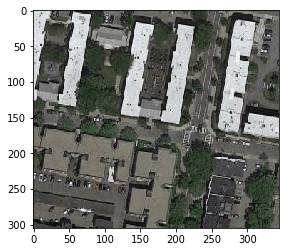

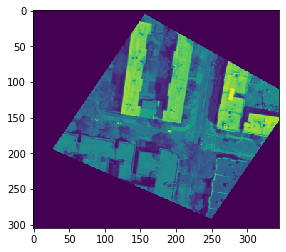

137
141.00808908370456


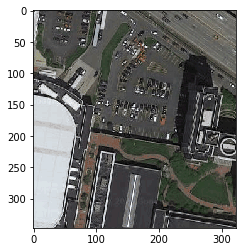

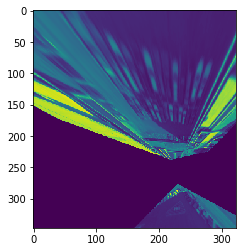

138
1177.3374614618783
30
!!!!!
139
1177.9163316520353
31
!!!!!
140
201.25919326438162
141
171.74251811817925
142
213.3032877603282
143
2298.312266283932
144
238.39687302014784
145
179.08790944187606
146
44.96825552298917


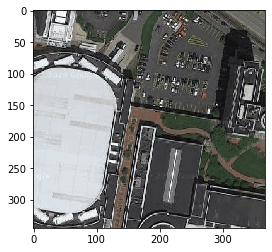

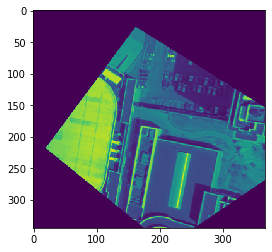

LinAlgError: Singular matrix

In [72]:
total_lose=0
cornner_error_list=[]
for i in range(num_sample):
    img_1,img_2,img_3,img_4,u_list_gt,v_list_gt=generate_samples_for_evaluate(i,satellite_img_list,cropped_img_in_original_HRO_list,label_list,simulated_drone_img_list)
    u_list_pre,v_list_pre, img_reverse=output_four_cornner(img_1,img_3)
    cornner_error=calculate_four_conner_error(u_list_pre,v_list_pre,u_list_gt,v_list_gt)
    cornner_error_list.append(cornner_error)
    print (i)
    print (cornner_error)
    if len(np.shape(img_reverse))==1:
        total_lose=total_lose+img_reverse[0]
        print (total_lose)
        print ("!!!!!")
    if cornner_error<150:
        plt.imshow(img_1)
        plt.show()
        plt.imshow(img_reverse)
        plt.show()
 

In [73]:
total_lose

31

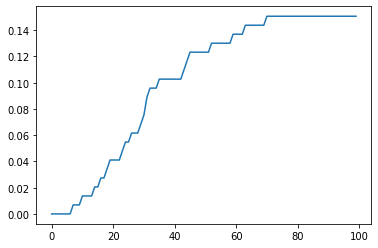

In [75]:
accumulate=[]
for i in range(100):
    accumulate.append(np.sum(np.asarray(cornner_error_list)<i))
    
plt.plot(np.asarray(accumulate)/146.0)

# Template matching

In [29]:
satellite_img=plt.imread(satellite_img_list[index])

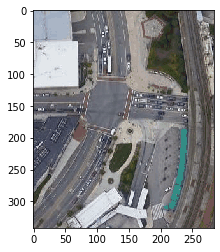

In [30]:
from skimage import data
from skimage.feature import match_template

image =  cv2.cvtColor(satellite_img, cv2.COLOR_RGB2GRAY)
template = cv2.cvtColor(img_1, cv2.COLOR_RGB2GRAY)

result = match_template(image, template )
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

plt.imshow(img_1)
plt.show()



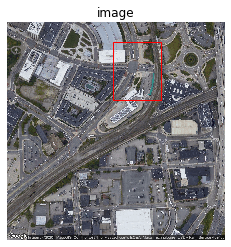

In [31]:
fig = plt.figure()
ax2 = fig.add_subplot(1, 1, 1)
ax2.imshow(satellite_img)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = template.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

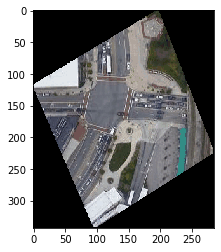

In [32]:
image =  cv2.cvtColor(satellite_img, cv2.COLOR_RGB2GRAY)
template = cv2.cvtColor(img_2, cv2.COLOR_RGB2GRAY)

result = match_template(image, template )
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

plt.imshow(img_2)
plt.show()



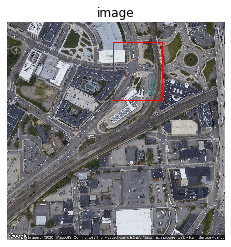

In [33]:
fig = plt.figure()
ax2 = fig.add_subplot(1, 1, 1)
ax2.imshow(satellite_img)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = template.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

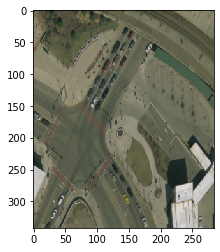

In [34]:
image =  cv2.cvtColor(satellite_img, cv2.COLOR_RGB2GRAY)
template = cv2.cvtColor(img_3, cv2.COLOR_RGB2GRAY)

result = match_template(image, template )
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

plt.imshow(img_3)
plt.show()


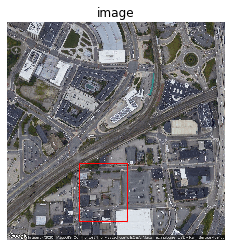

In [35]:
fig = plt.figure()
ax2 = fig.add_subplot(1, 1, 1)
ax2.imshow(satellite_img)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = template.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

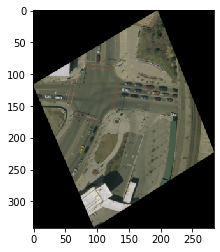

In [36]:
image =  cv2.cvtColor(satellite_img, cv2.COLOR_RGB2GRAY)
template = cv2.cvtColor(img_4, cv2.COLOR_RGB2GRAY)

result = match_template(image, template )
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

plt.imshow(img_4)
plt.show()


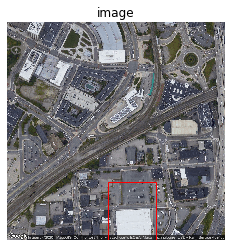

In [37]:
fig = plt.figure()
ax2 = fig.add_subplot(1, 1, 1)
ax2.imshow(satellite_img)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = template.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)